In [151]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('Data/pokemon.csv')

# reset index to 'Name'
df.set_index('Name', inplace=True)

# drop column '#'
df.drop('#', inplace=True, axis=1)
type_1_data = df['Type 1'].value_counts()
type_1_data

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

<BarContainer object of 18 artists>

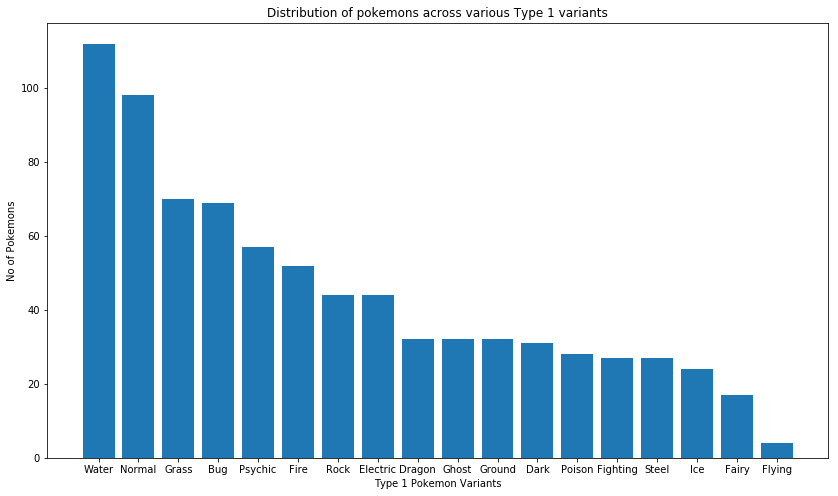

In [218]:
plt.figure(figsize=[14,8])
plt.xlabel("Type 1 Pokemon Variants")
plt.ylabel("No of Pokemons")
plt.title("Distribution of pokemons across various Type 1 variants")
plt.bar(type_1_data.index, type_1_data.values)

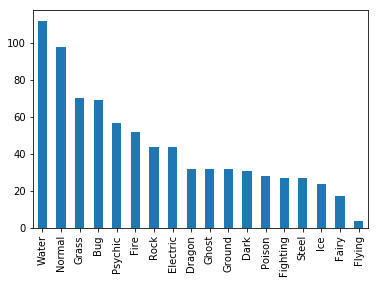

In [14]:
df['Type 1'].value_counts().plot(kind="bar")

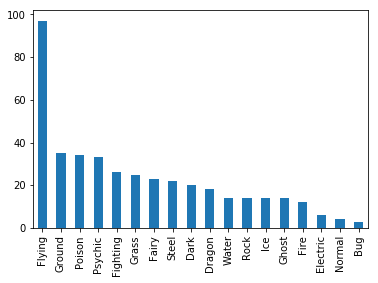

In [33]:
type_2 = df['Type 2'].value_counts(ascending=False)
type_2.plot(kind="bar")
plt.show()

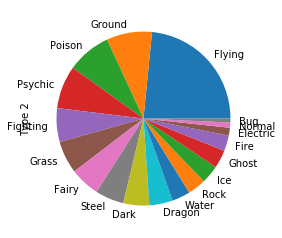

In [20]:
type_2_data = df['Type 2'].value_counts(ascending=False).plot(kind="pie")

In [80]:
type_1_attack_mean = df.groupby('Type 1')['Attack'].mean()
type_2_attack_mean = df.groupby('Type 2')['Attack'].mean()

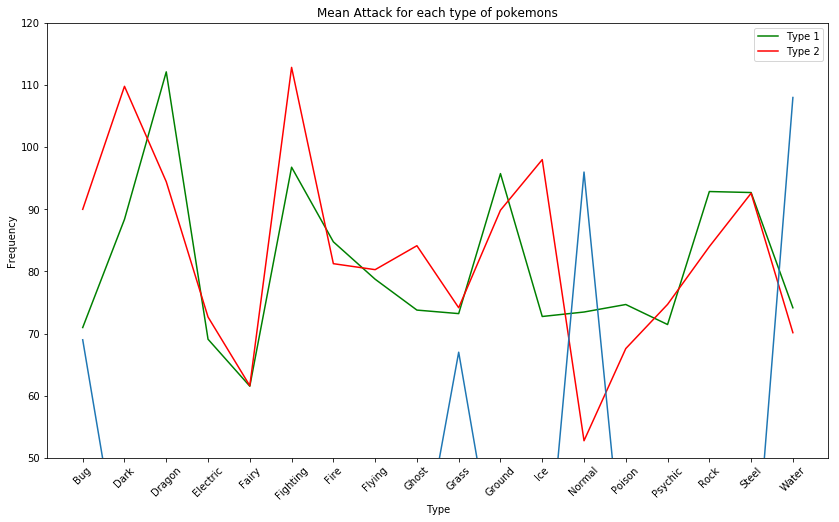

In [254]:
plt.figure(figsize=[14, 8])
plt.title('Mean Attack for each type of pokemons')
plt.xlabel('Pokemon Type')
plt.ylabel('Mean Attack')
plt.ylim((50,120))
plt.plot(type_1_attack_mean, color='green')
plt.plot(type_2_attack_mean, color='red')
plt.legend(['Type 1', 'Type 2'])
plt.savefig('Graph\Type_attack_mean.png')

In [97]:
type_1 = df.groupby(['Type 1'])['Attack'].mean()
type_2 = df.groupby(['Type 2'])['Attack'].mean()
type_1 = type_1.reset_index()
type_2 = type_2.reset_index()
type_1

,Type 1,Attack
0,Bug,70.971014
1,Dark,88.387097
2,Dragon,112.125000
3,Electric,69.090909
4,Fairy,61.529412
5,Fighting,96.777778
6,Fire,84.769231
7,Flying,78.750000
8,Ghost,73.781250
9,Grass,73.214286


In [157]:
merged = pd.merge(left=type_1, right=type_2, left_on='Type 1', right_on='Type 2')
merged.drop('Type 1', axis=1, inplace=True)
merged.rename(columns={'Type 2':'Type'}, inplace=True)
merged

,Attack_x,Type,Attack_y
0,70.971014,Bug,90.000000
1,88.387097,Dark,109.800000
2,112.125000,Dragon,94.444444
3,69.090909,Electric,72.666667
4,61.529412,Fairy,61.608696
5,96.777778,Fighting,112.846154
6,84.769231,Fire,81.250000
7,78.750000,Flying,80.288660
8,73.781250,Ghost,84.142857
9,73.214286,Grass,74.160000


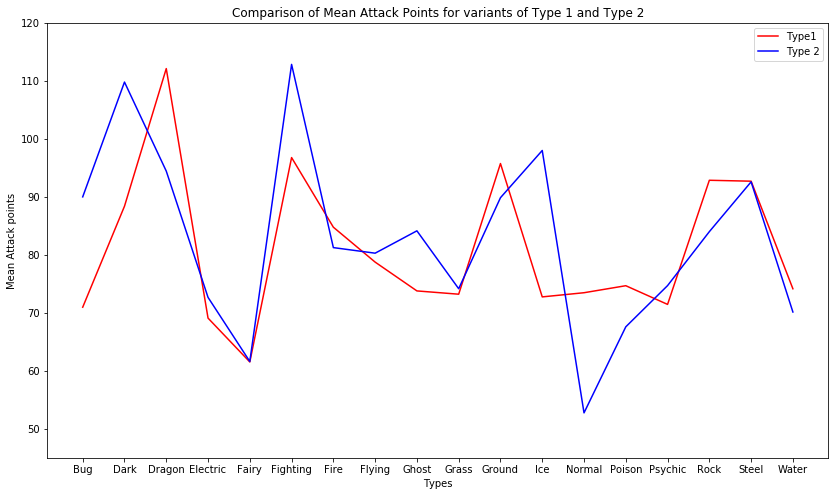

In [158]:
plt.figure(figsize=[14, 8])
plt.plot(merged.Type, merged.Attack_x, color='red')
plt.plot(merged.Type, merged.Attack_y, color='blue')
plt.xlabel('Types')
plt.ylabel('Mean Attack points')
plt.title('Comparison of Mean Attack Points for variants of Type 1 and Type 2')
plt.ylim((45,120))
plt.legend(['Type1', 'Type 2'])
plt.savefig('Graph\Type_attack_mean2.png')
plt.show()

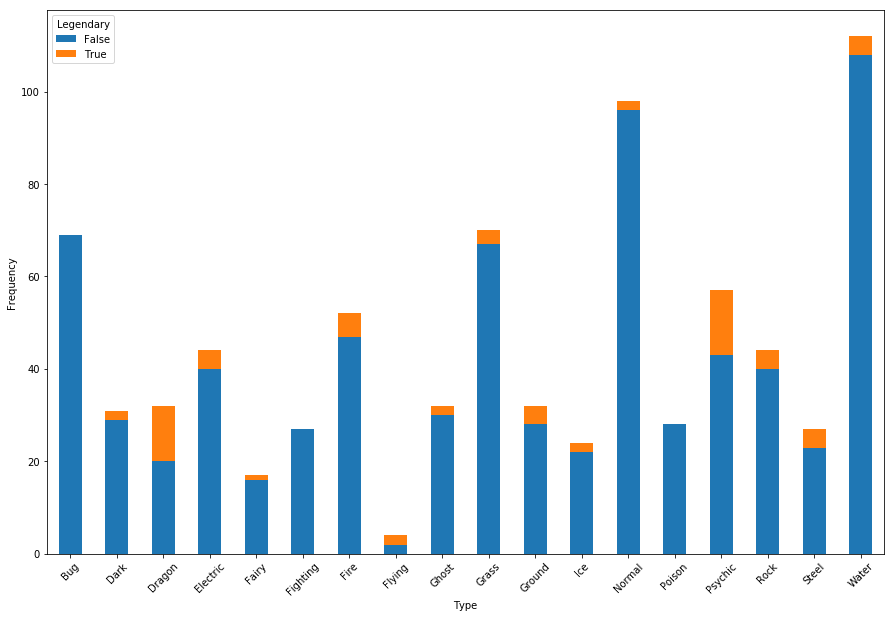

In [192]:
df.groupby(['Type 1', 'Legendary']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

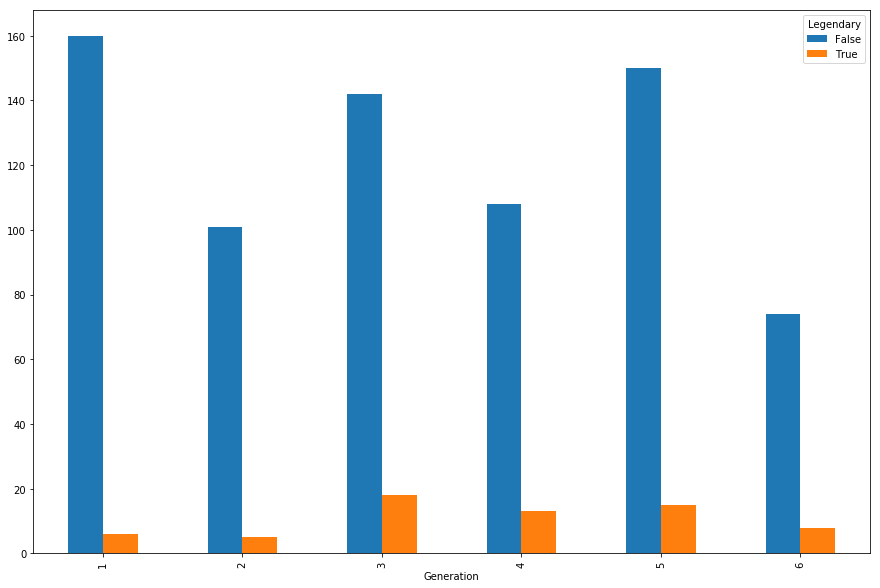

In [208]:
res = df.groupby(['Generation', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=False, figsize=(15,10))
plt.show()

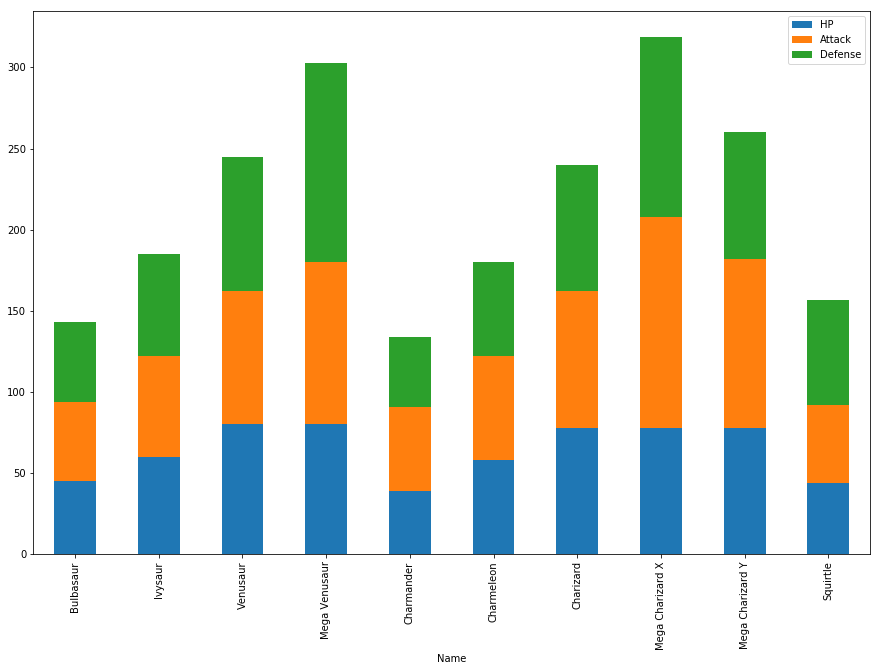

In [229]:
# plt.bar(type_1_data.index, type_1_data.values)
df[['HP', 'Attack', 'Defense']].iloc[:10,:].plot(kind='bar', stacked=True, figsize=[15, 10])
# plt.figure(figsize=[15,10])
# plt.xticks(rotation=90)
# plt.bar(df[['HP', 'Attack', 'Defense']].iloc[:10,:].index, df[['HP', 'Attack', 'Defense']].iloc[:10,1].values, stacked=True)
# print(df[['HP', 'Attack', 'Defense']].iloc[:10,:].index)
# print(df[['HP', 'Attack', 'Defense']].iloc[:10,1].values)

In [232]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [234]:
mean_attack = df['Attack'].mean()
mean_attack

79.00125

In [240]:
dragon = df[df['Type 1'] == 'Dragon']
mean_dragon = dragon['Attack'].mean()
mean_dragon

112.125

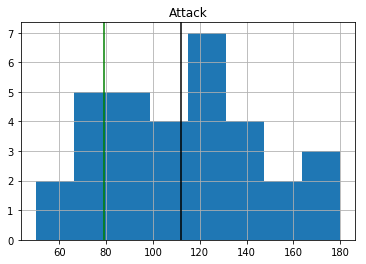

In [256]:
dragon.hist(column='Attack', bins=8)
plt.axvline(x=mean_attack, color='green')
plt.axvline(x=mean_dragon, color='black')
plt.show()

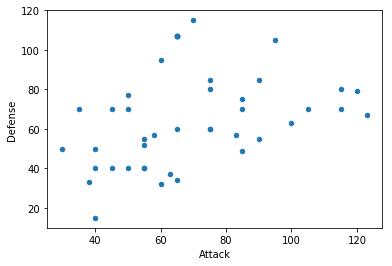

In [273]:
electric = df[df['Type 1'] == 'Electric']
electric.plot.scatter(x='Attack', y='Defense')
plt.show()

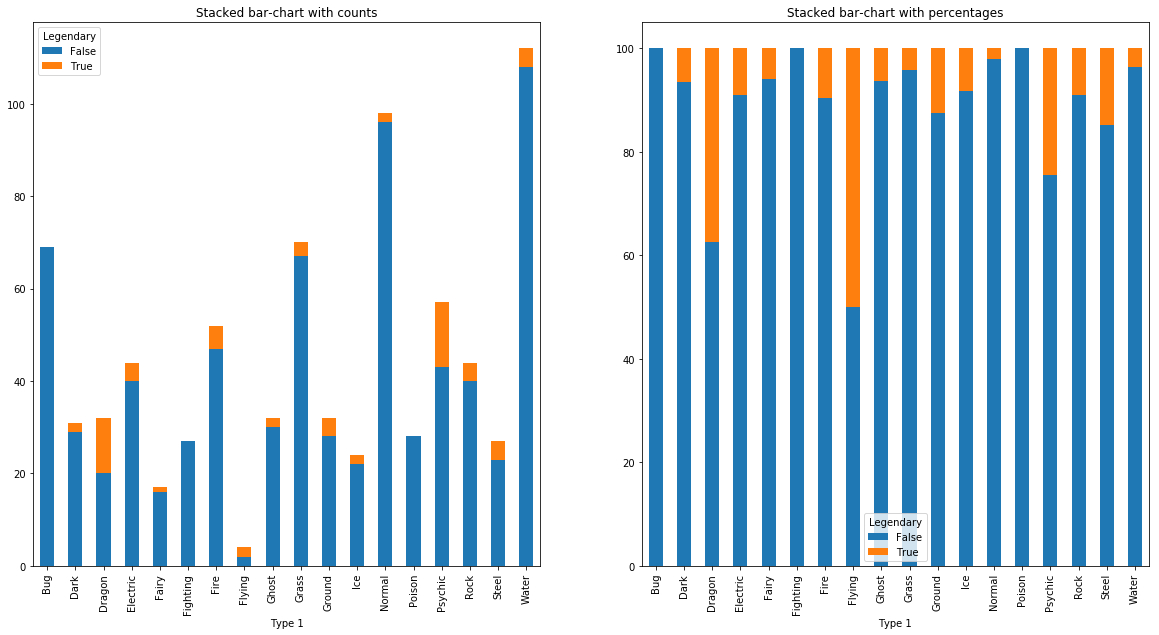

In [301]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))
res = df.groupby(['Type 1', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')

new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')
plt.savefig("Graph\SubPlot.png")

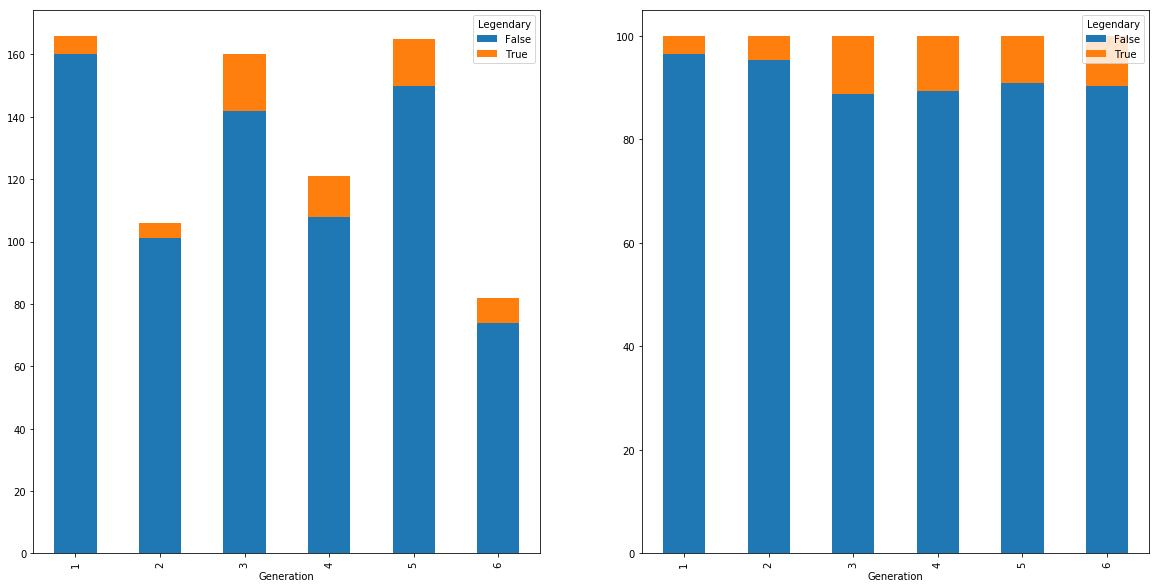

In [321]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))
res = df.groupby(['Generation', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked='True', ax=ax_1)
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)

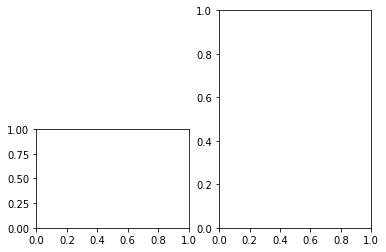

In [346]:
ax1 = plt.subplot2grid(shape=(2, 2), loc=(1, 0))
ax2 = plt.subplot2grid(shape=(2, 2), loc=(0, 1), rowspan=2)